### **Unemployment_Analysis**

### **Importing libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("/content/drive/MyDrive/Unemployment in India.csv")
data = pd.read_csv("/content/drive/MyDrive/Unemployment_Rate_upto_11_2020.csv")
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

### **Reading & Analyzing Data**

In [ ]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
print(data.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [ ]:
data.columns=['State','Month','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']
print("State with highest Unemployment:-",data['State'].value_counts().idxmax())
print("State with Lowest Unemployment:-",data['State'].value_counts().idxmin())

State with highest Unemployment:- Andhra Pradesh
State with Lowest Unemployment:- Sikkim


In [ ]:
data1=data[['State','Estimated Unemployment Rate']].groupby('State').sum().sort_values(by='Estimated Unemployment Rate',ascending=False)
data1.head(10) #top 10 states

,Estimated Unemployment Rate
State,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


<ipython-input-31-0c964a6ebb84>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-31-0c964a6ebb84>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



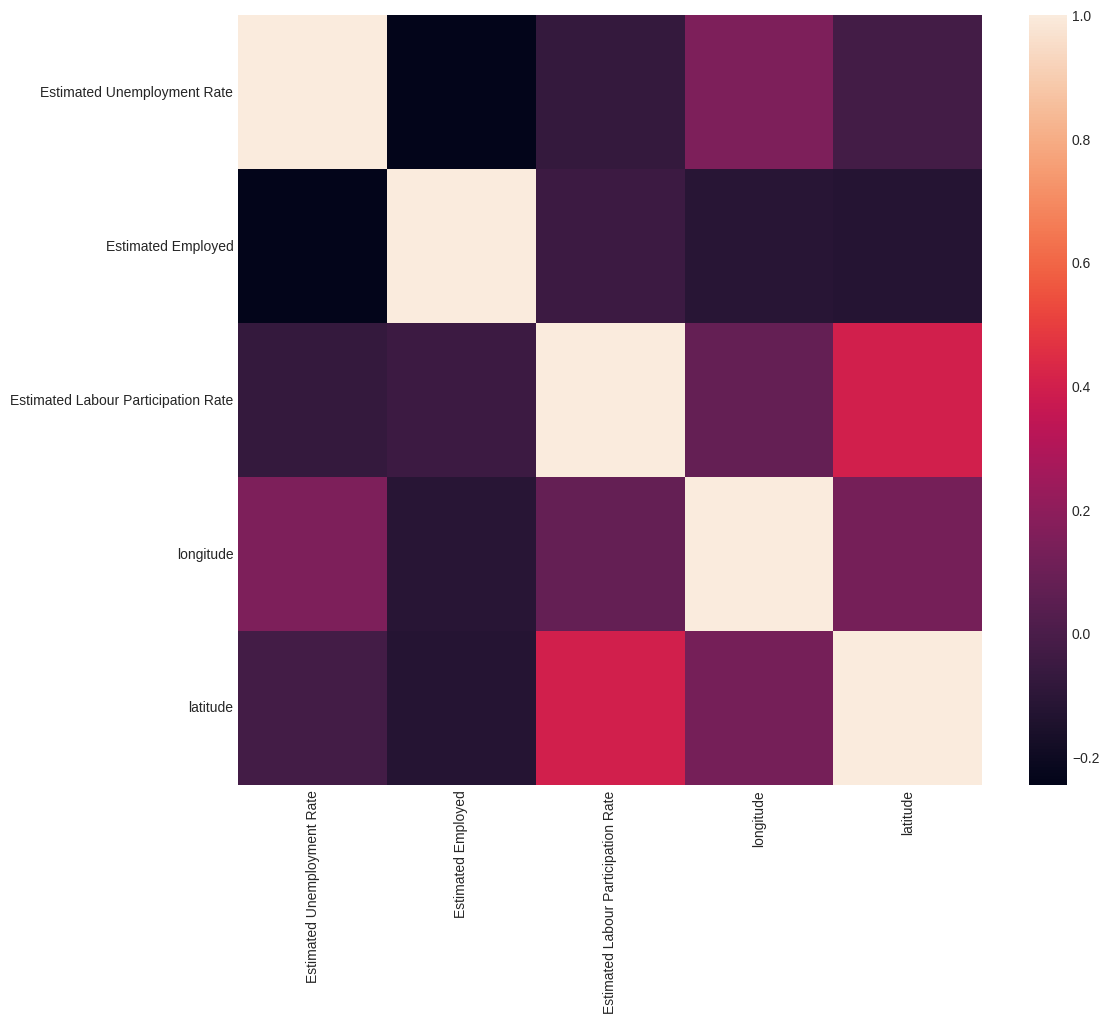

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())
plt.show()

### **Data Visualization**

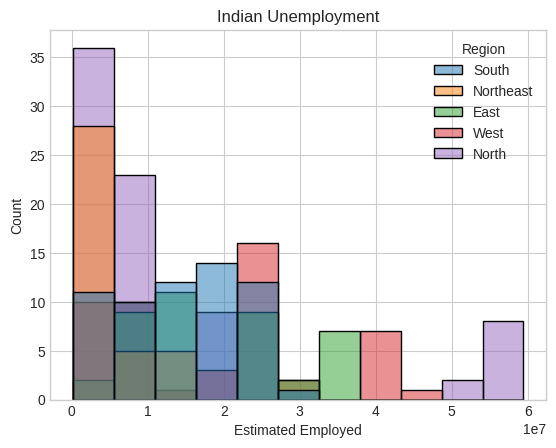

In [ ]:
data.columns= ['State','Month','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

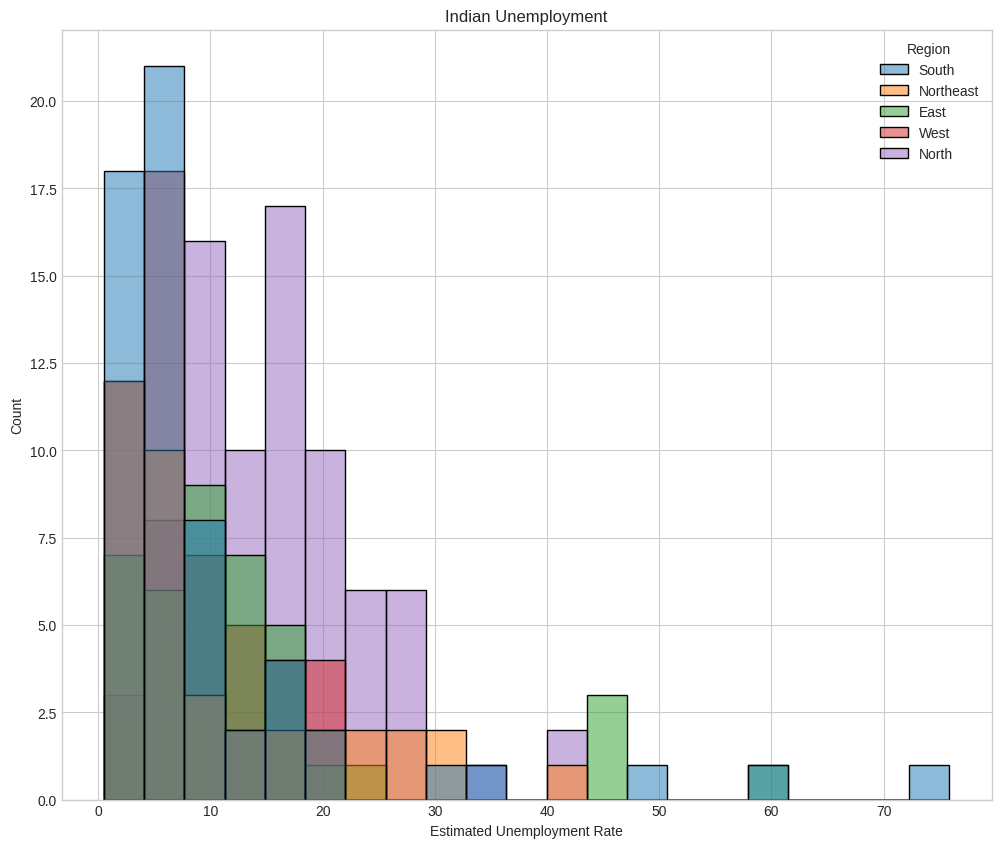

In [ ]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

Text(0, 0.5, 'Number of people unemployed in %')

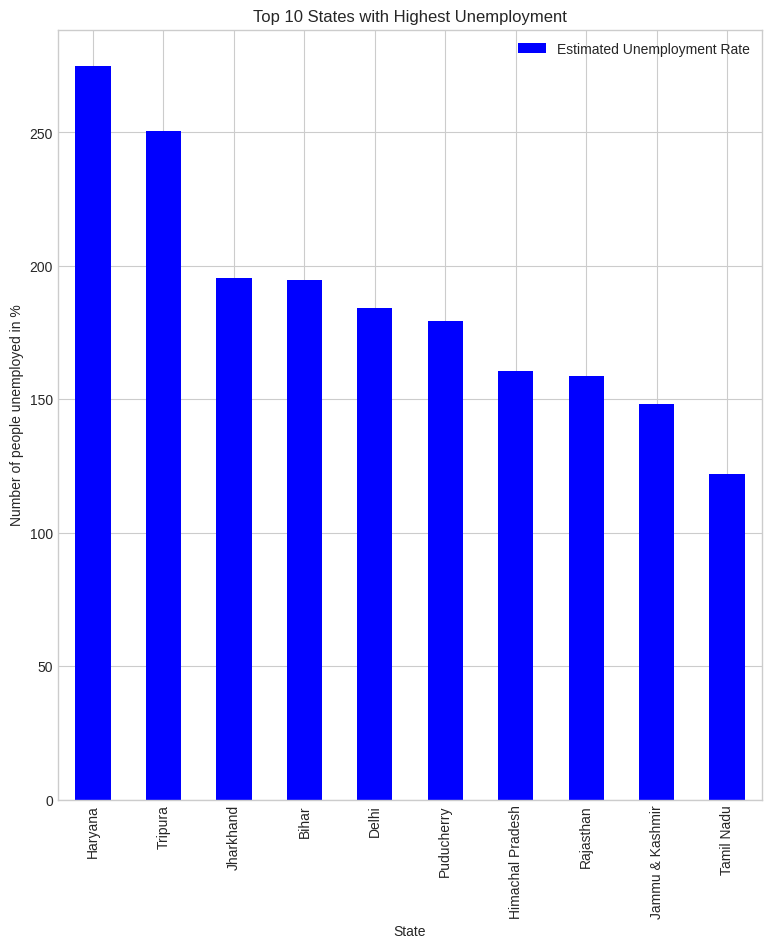

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
data1[:10].plot(kind="bar",color="blue",figsize=(20,10),ax=ax0)
ax0.set_title("Top 10 States with Highest Unemployment")
ax0.set_xlabel("State")
ax0.set_ylabel("Number of people unemployed in %")

Text(0, 0.5, 'Number of People Unemployed (in %)')

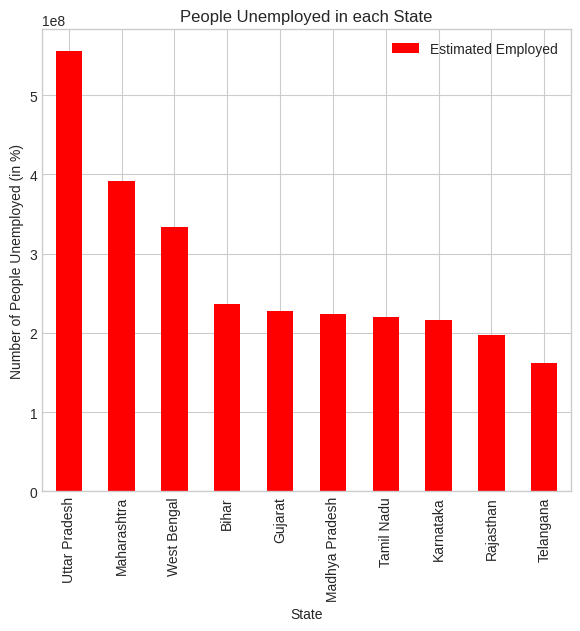

In [ ]:
# State wise rate of unemployement

data1 = data[["State","Estimated Employed"]].groupby("State").sum().sort_values(by="Estimated Employed", ascending =False)
data1.head(10)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)

data1[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Unemployed in each State")
ax0.set_xlabel("State")
ax0.set_ylabel("Number of People Unemployed (in %)")

In [ ]:
fig = px.scatter_geo(data,'longitude', 'latitude', color="State",
                     hover_name="State", size="Estimated Unemployment Rate",
                     animation_frame="Month",scope='asia',title='Impack of lockdown on employement in India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,40], lonaxis_range=[65, 100],oceancolor="lightblue",
    showocean=True)

fig.show()

In [ ]:
data.Region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [ ]:
Region = data.groupby(["Region"])[['Estimated Unemployment Rate', "Estimated Employed", "Estimated Labour Participation Rate"]].mean()
Region = pd.DataFrame(Region).reset_index()

In [ ]:
fig = px.scatter_matrix(data, dimensions=['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate'], color='Region')
fig.show()

In [ ]:
fig = px.bar(Region, x="Region", y="Estimated Unemployment Rate", color="Region", title="Average Unemployment Rate (Region)")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = px.bar(data, x='Region',y='Estimated Unemployment Rate', animation_frame = 'Month', color='State',
            title='Unemployment rate from Jan 2020 to Oct 2020')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

In [ ]:
unemployment = data.groupby(['Region','State'])['Estimated Unemployment Rate'].mean().reset_index()

unemployment.head()

,Region,State,Estimated Unemployment Rate
0,East,Bihar,19.471
1,East,Jharkhand,19.539
2,East,Odisha,6.462
3,East,West Bengal,10.192
4,North,Delhi,18.414


In [ ]:
fig = px.sunburst(unemployment, path=['Region','State'], values='Estimated Unemployment Rate',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()